In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
data = Dataset(r'C:\Users\pavan\Downloads\Earth System\AS1\BOB\salinity.nc','r')
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.5  17-Jan-24
    Conventions: CF-1.0
    dimensions(sizes): LON29_41(13), LAT35_48(14), TAX(1)
    variables(dimensions): float64 LON29_41(LON29_41), float64 LAT35_48(LAT35_48), float64 TAX(TAX), float32 SSS(TAX, LAT35_48, LON29_41)
    groups: 

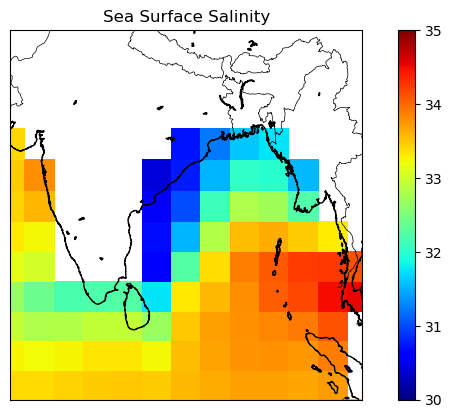

In [26]:
lats = data.variables['LAT35_48'][:]
lons = data.variables['LON29_41'][:]
sss = data.variables['SSS'][:]

mp = Basemap(projection = 'merc', 
             llcrnrlon =  70,
             llcrnrlat =   0,
             urcrnrlon =  100,
             urcrnrlat =  30, 
             resolution = 'i')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
    

c_scheme = mp.pcolor(x, y, np.squeeze(sss[0,:,:]), cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
plt.title('Sea Surface Salinity')
plt.clim(30.0, 35.0)
plt.savefig(r'C:\Users\pavan\Downloads\Earth System\AS1\BOB\Salinity_sss.'+'jpg')
#plt.clf()
plt.show()


In [17]:
data1 = Dataset(r'C:\Users\pavan\Downloads\Earth System\AS1\BOB\EMINP.nc','r')
em = data1.variables['EMINP']
data1.variables.keys()

dict_keys(['LON13_19', 'LAT16_22', 'LAT16_22_bnds', 'TAX', 'EMINP'])

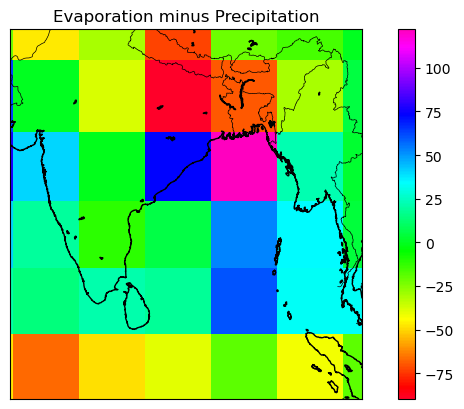

In [25]:
lats1 = data1.variables['LAT16_22'][:]
lons1 = data1.variables['LON13_19'][:]
eminp = data1.variables['EMINP'][:]

mp1 = Basemap(projection = 'merc', 
             llcrnrlon =  70,
             llcrnrlat =   0,
             urcrnrlon =  100,
             urcrnrlat =  30, 
             resolution = 'i')

lon1, lat1 = np.meshgrid(lons1, lats1)
x1,y1 = mp(lon1, lat1)
    

c_scheme = mp.pcolor(x1, y1, np.squeeze(eminp[0,:,:]), cmap = 'gist_rainbow')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp1.colorbar(c_scheme, location = 'right', pad = '10%')
plt.title('Evaporation minus Precipitation')
#plt.set_clim(-85.0, 85.0)
plt.savefig(r'C:\Users\pavan\Downloads\Earth System\AS1\BOB\eminusp.'+'jpg')
#plt.clf()
plt.show()
